# Problem statement : 

### We want to check if rolling out a new feature has actually increased watch time.



# Solution :
#### Since visually we can see that for some days there is a rise in consumption whereas fall in other days.

#### To confim we need to use a statistical test.

#### Since we want to compare two means we use Two-Sample t-Test for Equal Means
https://www.itl.nist.gov/div898/handbook/eda/section3/eda353.htm


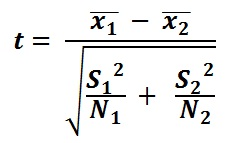




## Hypothesis Testing: 

#### Null Hypothesis : There is no difference between two means. (feature fails to create impact).
#### Alternate Hypothesis : There is signifcant difference between two means. (feature is awesome).

#### Critical value : 0.05 (We should be 95% sure about our decision.)

In [108]:
import pandas as pd
import matplotlib.pyplot as plt 

#  As we don't have inbuilt std dev function we use this

In [109]:
from math import sqrt
from functools import reduce

def stddev(lst):
    mean = float(sum(lst)) / len(lst)
    return sqrt(float(reduce(lambda x, y: x + y, map(lambda x: (x - mean) ** 2, lst))) / len(lst))

# Getting data, before feature is released

In [110]:
df = pd.read_csv('pre_release_data.csv', header=0)
df.dropna(inplace=True)

In [111]:
ts1 = df['sum(pro.time_spent)'].values.tolist()
ts1.sort()
mean_sample1 = sum(ts1)/len(ts1)
denominator_term1 = stddev(ts1)**2/len(ts1)

In [112]:
df = pd.read_csv('post_release_data.csv', header=0)
df.dropna(inplace=True)

In [113]:
ts2 = df['sum(pro.time_spent)'].values.tolist()
ts2.sort()
mean_sample2 = sum(ts2)/len(ts2)
denominator_term2 = stddev(ts2)**2/len(ts2)

In [114]:
T_value = (mean_sample1 - mean_sample2)/sqrt(std_dev_of_sample1 + std_dev_of_sample2)

In [115]:
T_value

0.049299155911354815

# Since we get T value 0.04 which is less than our critcal value of 0.05, we cannot reject our null hypothesis and have to accept that our feature fails to create impact post release.